In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load Iris dataset
iris = datasets.load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [4]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca)
print(X_test_pca)

[[-2.18530832 -0.05398983]
 [-1.96020534  0.39975889]
 [-2.27444229  0.36356678]
 [ 1.79851155  0.70121417]
 [ 1.56783059 -0.37535774]
 [ 1.23571939 -1.11012927]
 [ 2.22113851  2.61329712]
 [-1.9268267  -0.6640625 ]
 [-2.30122288 -1.15545893]
 [ 0.56923026 -1.70293553]
 [ 0.135823   -1.52317001]
 [-0.47259642 -1.82571799]
 [-2.31000896  0.05987494]
 [-2.18538189 -0.26223752]
 [ 1.31935677  0.35399502]
 [ 1.77864308  0.87914935]
 [-2.08154292  1.38821839]
 [ 0.24401823 -0.58450487]
 [ 0.89037933  0.03021746]
 [-0.03802805 -1.03535855]
 [-2.21299559  0.06537634]
 [ 1.93117812  1.06241378]
 [ 1.03836429 -1.31875517]
 [ 0.37336939 -0.57716967]
 [-2.21089408  1.38088319]
 [ 0.84571935  0.26511006]
 [ 1.9780271   0.88823228]
 [ 2.83939782  0.47861473]
 [-2.34118565  1.0281661 ]
 [ 0.94718846 -0.54541427]
 [ 1.42867937  0.27901135]
 [ 0.27857094 -0.83444261]
 [ 0.61518552 -0.39496648]
 [-2.6174203   1.66863735]
 [-2.42705089 -0.02794534]
 [-2.38125571  1.01976966]
 [-2.15518545  0.19961551]
 

In [5]:
# Train a perceptron model with added convergence tracking
ppn = Perceptron(max_iter=100, tol=1e-4, eta0=0.1, n_jobs=-1, random_state=8, warm_start=True)
ppn.fit(X_train_pca, y_train)

# show the weights w and fraction alpha
print('Weights: %s' % ppn.coef_)
print('Fraction alpha: %s' % ppn.intercept_)

Weights: [[-0.3940361   0.04864824]
 [ 0.22517187 -0.08517698]
 [ 0.59275098  0.16763177]]
Fraction alpha: [-0.1 -0.2 -0.5]


In [6]:
# Number of misclassified samples
y_pred = ppn.predict(X_test_pca)
print('Misclassified %d' % (y_test != y_pred).sum())

Misclassified 11


In [7]:
# Accuracy score
print('Accuracy score %.2f' % accuracy_score(y_test, y_pred))

Accuracy score 0.76


In [8]:
# Plot linear classifiers for Iris dataset
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'cyan', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

<ipython-input-8-b70540df9312>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


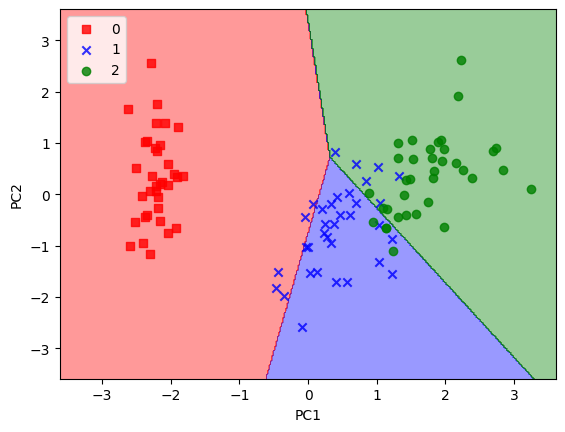

In [9]:
plot_decision_regions(X_train_pca, y_train, classifier=ppn)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

Confusion matrix:
 [[15  0  0]
 [ 1  8  7]
 [ 0  3 11]]


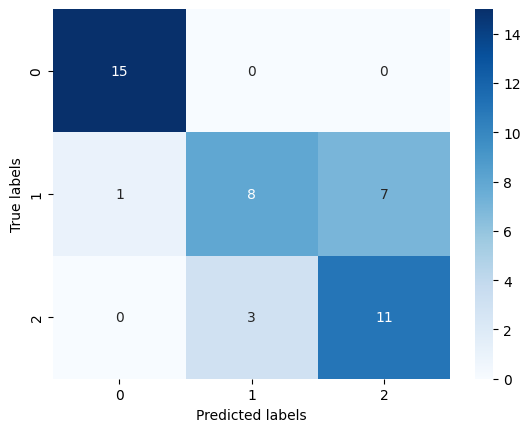

Precision: 0.756
Recall: 0.756
F1-score: 0.756
Sensitivity: 0.762
Specificity: 0.756
Accuracy score 0.756


In [10]:
# all test
# confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
# heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# precision, recall, f1-score, sensitivity, specificity
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('F1-score: %.3f' % f1_score(y_test, y_pred, average='micro'))
print('Sensitivity: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('Specificity: %.3f' % recall_score(y_test, y_pred, average='weighted'))
# Accuracy score
print('Accuracy score %.3f' % accuracy_score(y_test, y_pred))

[]
[array([-0.15139504,  0.1471089 , -0.23667834, -0.24300121, -0.17072206,
       -0.28210044,  0.05426985, -0.01744498, -0.02496408,  0.00403912,
        0.07466765,  0.27506558]), array([-0.15139504,  0.1471089 , -0.23667834, -0.24300121, -0.16427972,
       -0.27295928,  0.15673815, -0.20012587,  0.04106993, -0.07206635,
        0.11759356,  0.25135514]), array([-0.15139504,  0.1471089 , -0.23667834, -0.24300121, -0.07972398,
       -0.25063785,  0.29094819, -0.14852804,  0.00483176, -0.09438779,
        0.16233024,  0.29005352]), array([-0.15139504,  0.1471089 , -0.23667834, -0.24300121, -0.16991677,
       -0.15221094,  0.39900858, -0.25381218, -0.01932703,  0.03954083,
        0.16792232,  0.35455081]), array([-0.15139504,  0.1471089 , -0.23667834, -0.24300121, -0.18280145,
       -0.1928147 ,  0.29472951, -0.27543413, -0.06764459, -0.00510204,
        0.17351441,  0.32875189]), array([-0.15139504,  0.1471089 , -0.23667834, -0.24300121, -0.11596216,
       -0.13903066,  0.430750

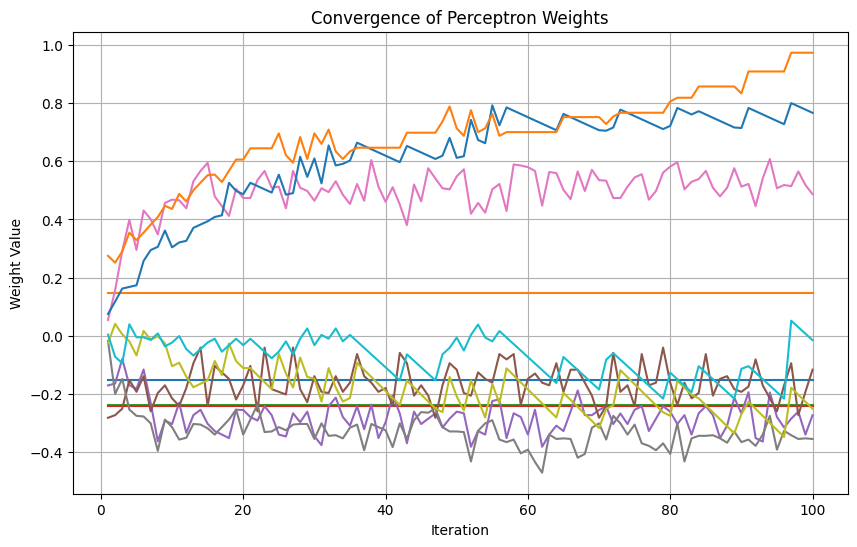

In [12]:
# Train a perceptron model with added convergence tracking
ppn = Perceptron(max_iter=100, tol=1e-4, eta0=0.1, n_jobs=-1, random_state=8, warm_start=True)

weights_history = []  # To store the weights at each iteration

print(weights_history)

for _ in range(ppn.max_iter):
    ppn.partial_fit(X_train_std, y_train, classes=np.unique(y_train))
    weights_history.append(ppn.coef_.ravel().copy())

print(weights_history)

# Convert the list of weights into a numpy array for easy manipulation
weights_history = np.array(weights_history)

print(weights_history)
# Plot the convergence of weights
plt.figure(figsize=(10, 6))
for i in range(weights_history.shape[1]):
    plt.plot(range(1, ppn.max_iter + 1), weights_history[:, i], label=f'Weight {i + 1}')

plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Convergence of Perceptron Weights')
#plt.legend()
plt.grid(True)
plt.show()
